
# Project: Investigating a TMDb movie data. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction 

## This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I am going to explore three research questions and visulaize it. Further, I will provide the summary at the end of this project. 


In [1]:
#Importing all the required packages to load, clean, explore and visualize data. 
#Also, including %matplotlib inline so that my visualizations are plotted. 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import matplotlib.cm as cm

<a id='wrangling'></a>
## Data Wrangling
> In this section I will load the data and check the general information, check for cleanness to decide what needs to be removed and modified.

### General Properties

In [2]:
# Loading my data and printing out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('/Users/office4/Downloads/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Performing operations to inspect data. 
#Checking types and looking for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Checking number of rows and columns
df.shape

(10866, 21)

### Data Cleaning

After exploring the structure of the data, I decided that my data cleaning process will include removing unuseful columns, changing the type of values in the columns so it will be easier to explore and visualize data. I divided the process by several steps.

In [5]:
#Step 1: Removing unuseful columns, I will not be needing them for my analysis.
df.drop(['id','imdb_id','cast','homepage','keywords','overview','release_date','budget_adj','revenue_adj','production_companies','tagline'],axis=1, inplace=True)

In [6]:
#Checking what is left after removing columns
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [7]:
#Changing the type of column from float to integer. 
df['popularity'] = df['popularity'].astype(int)

In [8]:
#Changing the type of column from float to integer.
df['vote_average'] = df['vote_average'].astype(int)

In [9]:
#Splitting column by values separated by pipe (|)characters.
df['genres'] = df['genres'].str.split('|',n=1, expand=True)

In [10]:
#Reducing the budget by million, since it is easier to work with smaller numbers.
df['budget'] = df['budget']/1000000

In [11]:
#Reducing the revenue by million, since it is easier to work with smaller numbers.
df['revenue'] = df['revenue']/1000000

In [12]:
#Renaming column names after reducing budget and revenue by million. 
df = df.rename(columns={'budget':'budget_in_millions', 'revenue':'revenue_in_millions'})
df.head()

,popularity,budget_in_millions,revenue_in_millions,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,32,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action,5562,6,2015
1,28,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action,6185,7,2015
2,13,110.0,295.238201,Insurgent,Robert Schwentke,119,Adventure,2480,6,2015
3,11,200.0,2068.178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,5292,7,2015
4,9,190.0,1506.249360,Furious 7,James Wan,137,Action,2947,7,2015


In [13]:
#Checking the structure of the data again to see if there are more missing values and more types of columns to correct. 
df.info()
#Looks like director columns has more missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
popularity             10866 non-null int32
budget_in_millions     10866 non-null float64
revenue_in_millions    10866 non-null float64
original_title         10866 non-null object
director               10822 non-null object
runtime                10866 non-null int64
genres                 10843 non-null object
vote_count             10866 non-null int64
vote_average           10866 non-null int32
release_year           10866 non-null int64
dtypes: float64(2), int32(2), int64(3), object(3)
memory usage: 764.1+ KB


In [14]:
#Removing rows with null values
df.dropna(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> Now, after cleaning and trimming data, data is ready for exloration.I am going to ask three questions and I will compute statistics and create visualisation. At the end of this project I will provide a summary with the goal of addressing the reasearch  questions.

### Research Question 1: What is the average profitability in different movie genres?
Let's see if the average profitability is different for every genre. 

In [15]:
#In order to find profitability, I need to deduct budget money from revenue money.
#Grouping the average budget for every movie genres. 
bud_gen = df.groupby('genres').budget_in_millions.mean()
bud_gen

genres
Action             24.693091
Adventure          40.233506
Animation          21.762402
Comedy             10.405491
Crime              13.433568
Documentary         0.438603
Drama              10.349845
Family             18.576677
Fantasy            23.448720
Foreign             0.000000
History            15.934523
Horror              5.623481
Music              10.960417
Mystery            10.106332
Romance            11.191865
Science Fiction    25.348405
TV Movie            0.263514
Thriller           12.184842
War                22.834068
Western            19.516995
Name: budget_in_millions, dtype: float64

In [16]:
##Grouping the average revenue for every movie genres.
rev_gen = df.groupby('genres').revenue_in_millions.mean()
rev_gen

genres
Action              60.873392
Adventure          124.755984
Animation           72.354392
Comedy              29.378496
Crime               33.351096
Documentary          2.009933
Drama               25.201186
Family              62.355301
Fantasy             67.293928
Foreign              0.000000
History             44.360618
Horror              16.884711
Music               24.006416
Mystery             24.159053
Romance             38.091289
Science Fiction     80.407555
TV Movie             0.567568
Thriller            26.483238
War                 45.907659
Western             31.090946
Name: revenue_in_millions, dtype: float64

In [17]:
#Finding profit by deducting budget from revenue. 
#Sorting ascending profit values. 
profit_gen = rev_gen - bud_gen
profit_gen = profit_gen.sort_values(ascending=False)

In [18]:
#Simple statisctics of genres profitability 
profit_gen.describe()

count    20.000000
mean     25.611321
std      21.325806
min       0.000000
25%      12.677987
50%      19.445266
75%      38.079882
max      84.522479
dtype: float64

Text(0,0.5,'Average profit in millions')

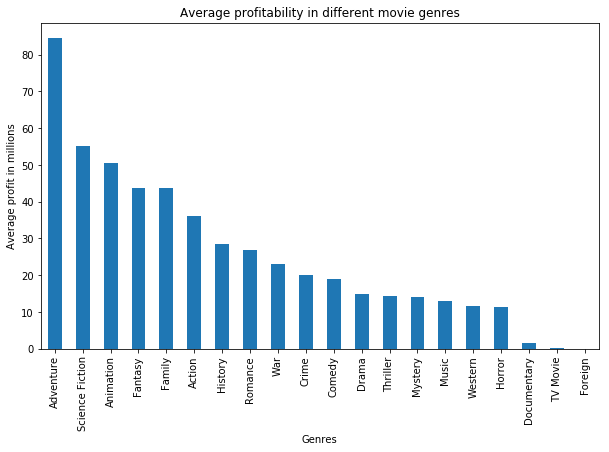

In [19]:
#Creating a bar plot to visualize the profitability for every movie genres. 
profit_gen.plot(kind='bar',figsize=(10,6))
plt.title('Average profitability in different movie genres')
plt.xlabel('Genres')
plt.ylabel('Average profit in millions')

### Research Question 2: What is the most popular runtime of movies?

In [20]:
# Continuing to explore the data to address my second additional research question.
#Checking the simple statistic summary of runtime column
df['runtime'].describe()


count    10801.000000
mean       102.188779
std         30.782604
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [21]:
#Using min, 25%, 50%, 75%, max numbers from summary statistics to create bin edges to divide runtime by 4 categories.
bin_edges = [0,90,99,111,900]

In [22]:
#Creating labels for runtime categories
bin_names = ['0_runtime','medium','mod_medium','long']

In [23]:
#Creating a new column "runtime_category"using bin edges and labels created earlier
df['runtime_category'] = pd.cut(df['runtime'],bin_edges, labels = bin_names)
df.head()

,popularity,budget_in_millions,revenue_in_millions,original_title,director,runtime,genres,vote_count,vote_average,release_year,runtime_category
0,32,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action,5562,6,2015,long
1,28,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action,6185,7,2015,long
2,13,110.0,295.238201,Insurgent,Robert Schwentke,119,Adventure,2480,6,2015,long
3,11,200.0,2068.178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,5292,7,2015,long
4,9,190.0,1506.249360,Furious 7,James Wan,137,Action,2947,7,2015,long


In [24]:
#Checking the count of movies for every category 
df.groupby('runtime_category').original_title.count()

runtime_category
0_runtime     2891
medium        2647
mod_medium    2535
long          2700
Name: original_title, dtype: int64

In [25]:
#Grouping runtime categories by average popularity
pop_runtime = df.groupby('runtime_category').popularity.mean()
pop_runtime

runtime_category
0_runtime     0.095815
medium        0.182093
mod_medium    0.262722
long          0.585556
Name: popularity, dtype: float64

Text(0,0.5,'Popularity level')

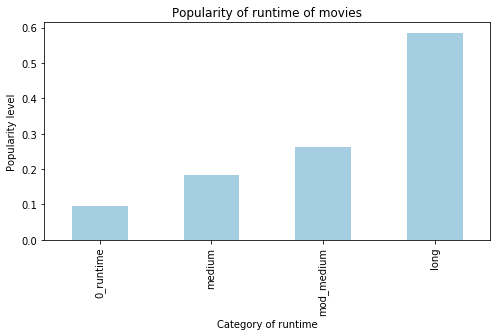

In [26]:
#Creating a bar plot to show what runtime of movies is popular
pop_runtime.plot(kind='bar',figsize=(8,4),colormap='Paired')
plt.title('Popularity of runtime of movies')
plt.xlabel('Category of runtime')
plt.ylabel('Popularity level')

### Research Question 3: Does number of movies released increase every year since 2001?
I wonder if number of movies released increase every year. 

In [27]:
mov_rel = df.groupby('release_year').original_title.count()
last15 = mov_rel.tail(15)
last15

release_year
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    435
2008    488
2009    528
2010    480
2011    539
2012    581
2013    652
2014    694
2015    624
Name: original_title, dtype: int64

In [28]:
last15.describe()

count     15.000000
mean     459.133333
std      146.135879
min      241.000000
25%      335.000000
50%      480.000000
75%      560.000000
max      694.000000
Name: original_title, dtype: float64

Text(0,0.5,'Number of movies released')

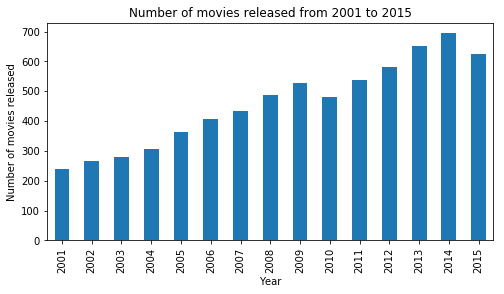

In [29]:
#Creating a bar plot to see variation of movies released from 2001 to 2015
last15.plot(kind='bar',figsize=(8,4))
plt.title('Number of movies released from 2001 to 2015')
plt.xlabel('Year')
plt.ylabel('Number of movies released')

<a id='conclusions'></a>
## Conclusions

Summary of research question 1: What is the average profitability in different movie genres?
The most profitable movie genre is an adventure, with the average profitability rounded to 124 million. The least popular genre is foreign with 0 average profitability. The mean is 25.6 million, the standard deviation is 21, which means data profitability values of every genre are spread out over a wider range of values.

Summary of research question 2: What is the most popular runtime of movies?
According to exploration, 58% of people prefer long movies with an average of 900 runtimes. The popularity increases as runtime increases. The least popular movies are with 0 runtimes, only 9% of people prefer them. Overall, the average runtime of movies is 102. Also, I checked the count of movies, the least popular movies are with 0 runtimes, but they have the highest count of 2891. 

Summary of research question 3: Does a number of movies released increase every year since 2001?
The number of movies released had been steadily increasing from 2001 to 2009, after 2009 the number had been alternating. 2014 has the highest number of 694 of movies released. The lowest number of 241 movies released was in 2001. The average released movies for 15 years is 459.
